In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import datetime

from src.poly_reg import model_county
from src.poly_reg import model_state
from src.data_import import extract_nyt
import src.data_import as di

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
#Base data sets
nyt_df = di.extract_nyt()
airports_df = di.extract_airports()
counties_df = di.extract_geography()

In [4]:
#Build international arrivals influence df
intl_arrivals_df = di.build_intl_arrivals_index_df(counties_df, airports_df, 100)

In [6]:
#First, get max cases, deaths
grouped = nyt_df.groupby('sc')
cases = grouped['cases'].agg([np.max])
cases.columns = ['cases']
deaths = grouped['deaths'].agg([np.max])
deaths.columns = ['deaths']


In [14]:
big_df = pd.merge(intl_arrivals_df, counties_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df = pd.merge(deaths,big_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df = pd.merge(cases,big_df, how='inner', left_on=['sc'], right_on=['sc'])

big_df['death_rate'] = big_df['deaths'] / big_df['Pop'] * 100000
big_df['case_rate'] = big_df['cases'] / big_df['Pop'] * 100000
big_df['intl_normed'] = big_df['international'] / big_df['Pop']
clean_df = big_df[[
    'sc',
    'cases',
    'deaths',
    'case_rate',
    'death_rate',
    'international',
    'intl_normed',
    'domestic',
    'airports',
    'Pop'  
]]
clean_df

,sc,cases,deaths,case_rate,death_rate,international,intl_normed,domestic,airports,Pop
0,Alabama:Autauga,12,1,21.989701,1.832475,0.0,0.000000,0.0,[],54571
1,Alabama:Baldwin,38,1,20.848764,0.548652,0.0,0.000000,0.0,[],182265
2,Alabama:Barbour,3,0,10.926175,0.000000,0.0,0.000000,0.0,[],27457
3,Alabama:Bibb,7,0,30.547676,0.000000,0.0,0.000000,0.0,[],22915
4,Alabama:Blount,10,0,17.445309,0.000000,0.0,0.000000,0.0,[],57322
5,Alabama:Bullock,3,0,27.487631,0.000000,0.0,0.000000,0.0,[],10914
6,Alabama:Butler,1,0,4.773953,0.000000,0.0,0.000000,0.0,[],20947
7,Alabama:Calhoun,38,0,32.048038,0.000000,0.0,0.000000,0.0,[],118572
8,Alabama:Chambers,96,7,280.578694,20.458863,0.0,0.000000,0.0,[],34215
9,Alabama:Cherokee,6,0,23.086691,0.000000,0.0,0.000000,0.0,[],25989


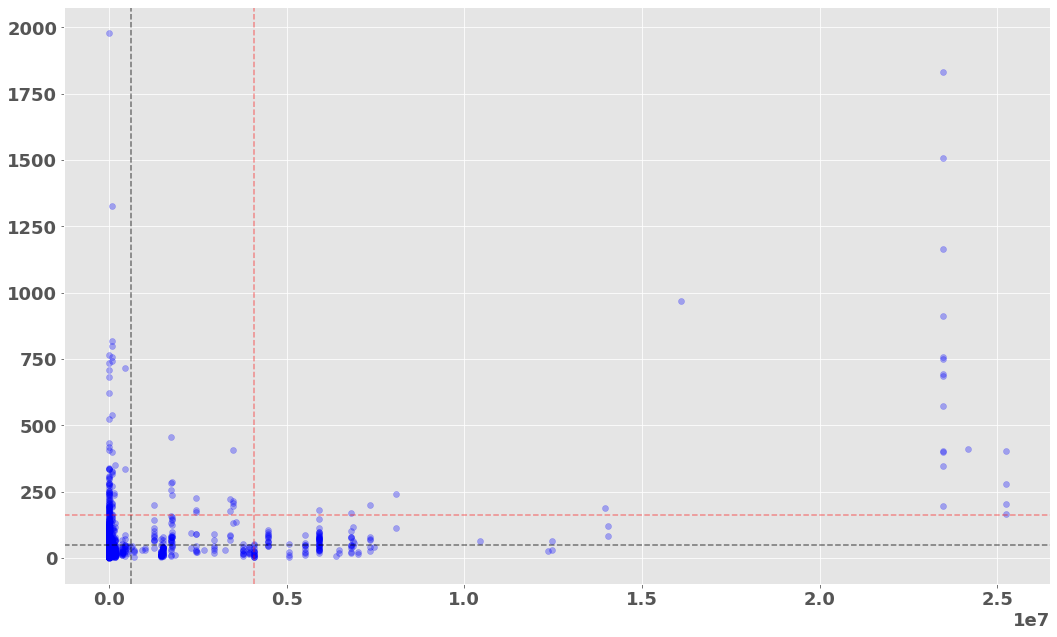

In [32]:
#International v case_rate
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
a1 = clean_df
pop_mean = a1['Pop'].mean()
plt.scatter(a1['international'], a1['case_rate'] , color = 'blue', label="actual data", alpha=0.3) 
plt.axhline(y=a1['case_rate'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axvline(x=a1['international'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axhline(y=a1['case_rate'].quantile(.95), color='r', linestyle='--', alpha=0.4)
plt.axvline(x=a1['international'].quantile(.95), color='r', linestyle='--', alpha=0.4)

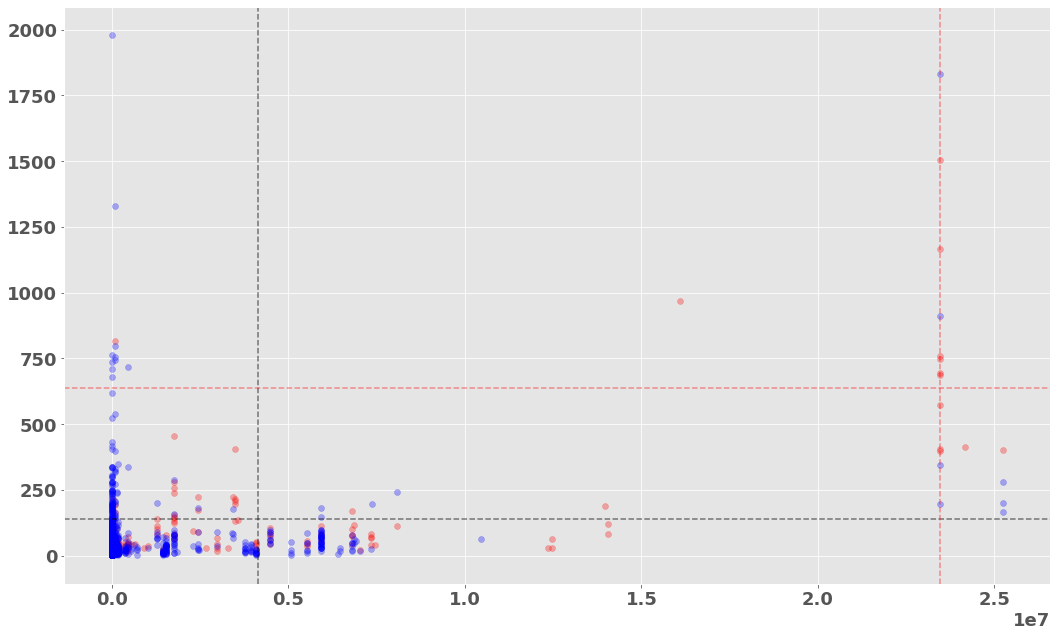

In [78]:
#International v case_rate
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
pop_threshold = a1['Pop'].quantile(0.5)
a1 = clean_df[clean_df['Pop']>pop_threshold]
a2 = clean_df[clean_df['Pop']<pop_threshold]

plt.scatter(a1['international'], a1['case_rate'] , color = 'red', label="actual data", alpha=0.3) 
plt.scatter(a2['international'], a2['case_rate'] , color = 'blue', label="actual data", alpha=0.3) 
plt.axhline(y=a1['case_rate'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axvline(x=a1['international'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axhline(y=a1['case_rate'].quantile(.95), color='r', linestyle='--', alpha=0.4)
plt.axvline(x=a1['international'].quantile(.95), color='r', linestyle='--', alpha=0.4)

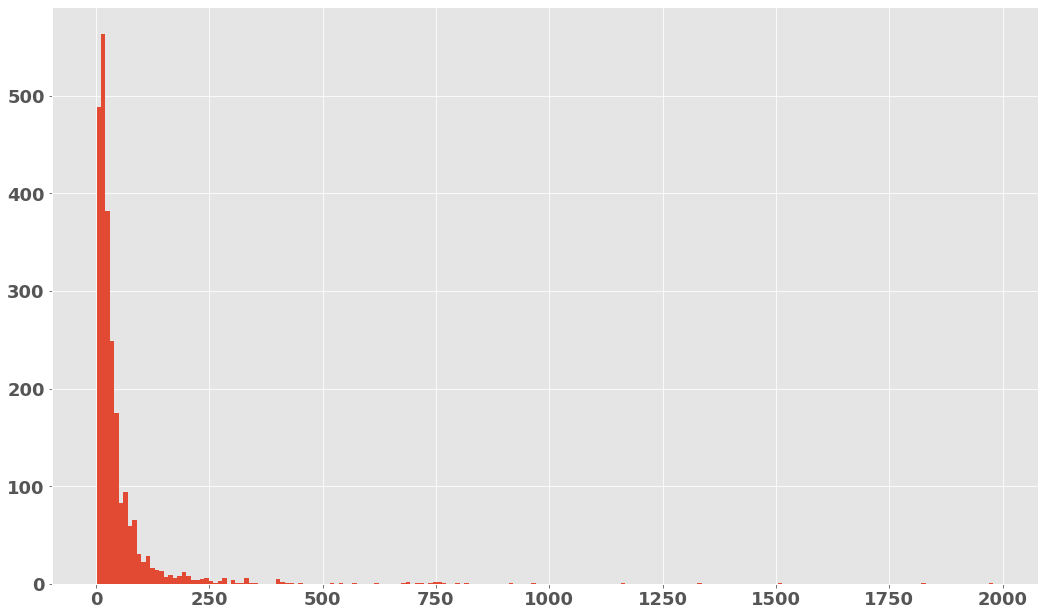

In [98]:
#Is distro of case rates normal?
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
clean_df
xxx = plt.hist(clean_df['case_rate'], bins=200)


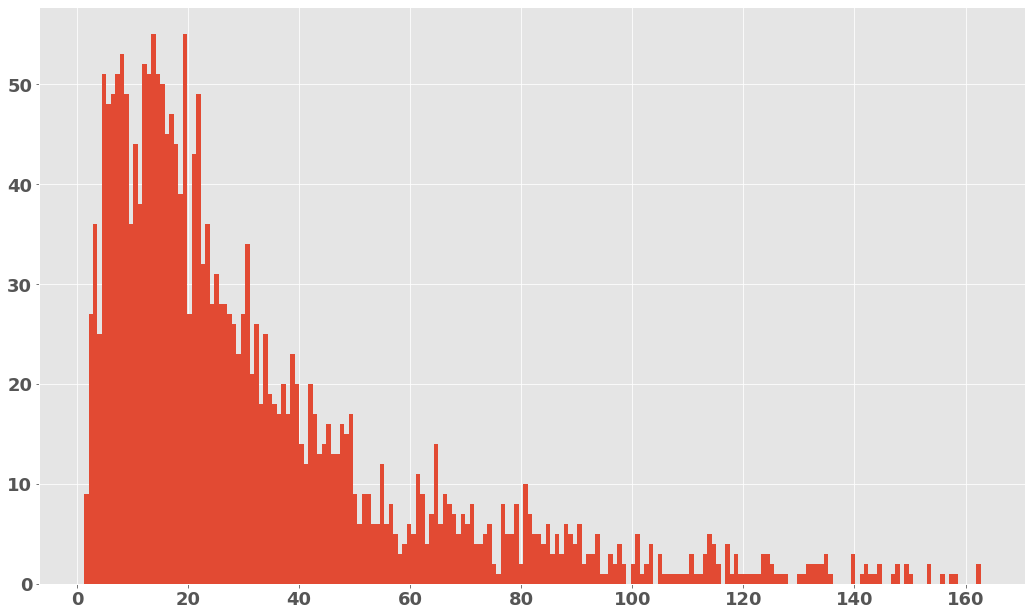

In [99]:
#What if we chop off the outliers
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
x1 = clean_df[clean_df['case_rate']< clean_df['case_rate'].quantile(.95)]
xxx = plt.hist(x1['case_rate'], bins=200)
#Still bunched up against zero

In [108]:
#H0 = counties with over 10m in int'l arrivals w/i 100km have the same Coronavirus rate as those with less than 10m
threshold = 5e6
s1 = clean_df[clean_df['international']>threshold]
s1mu = s1['case_rate'].mean()
s1std = s1['case_rate'].std()
s2 = clean_df[clean_df['international']<threshold]
s2mu = s2['case_rate'].mean()
s2std = s2['case_rate'].std()
print('Sample 1 mu: {}, std: {}, count: {}'.format(s1mu, s1std, len(s1)))
print('Sample 2 mu: {}, std: {}, count: {}'.format(s2mu, s2std, len(s2)))

Sample 1 mu: 173.89485857551634, std: 303.45982412507266, count: 104
Sample 2 mu: 44.51290457676506, std: 84.96265004447052, count: 2308


In [110]:
#Must go non-parametric: U-test
results = stats.mannwhitneyu(s1['case_rate'], s2['case_rate'], alternative="greater")
print(results)


MannwhitneyuResult(statistic=187938.0, pvalue=7.099895087383195e-23)


In [149]:
#Build international arrivals influence df
intl_arrivals_df2 = di.build_intl_arrivals_index_df2(counties_df, airports_df, 300)

In [150]:
big_df2 = pd.merge(intl_arrivals_df2, counties_df, how='inner', left_on=['sc'], right_on=['sc'])
big_df2 = pd.merge(deaths,big_df2, how='inner', left_on=['sc'], right_on=['sc'])
big_df2 = pd.merge(cases,big_df2, how='inner', left_on=['sc'], right_on=['sc'])

big_df2['death_rate'] = big_df['deaths'] / big_df['Pop'] * 100000
big_df2['case_rate'] = big_df['cases'] / big_df['Pop'] * 100000
big_df2['intl_normed'] = big_df['international'] / big_df['Pop']
clean_df2 = big_df2[[
    'sc',
    'cases',
    'deaths',
    'case_rate',
    'death_rate',
    'international',
    'intl_normed',
    'domestic',
    'airports',
    'Pop'  
]]
clean_df2.sort_values(by='case_rate', ascending=False)

,sc,cases,deaths,case_rate,death_rate,international,intl_normed,domestic,airports,Pop
483,Idaho:Blaine,423,2,1978.854790,9.356287,1.000000e+00,0.000000,1.000000e+00,[],21376
1455,New York:Rockland,5703,76,1829.720200,24.383436,4.309742e+05,75.279893,9.782502e+05,"[New York, NY (JFK), Newark, NJ (EWR), Boston,...",311687
1471,New York:Westchester,14293,253,1505.932381,26.656468,4.309773e+05,24.721781,9.570363e+05,"[New York, NY (JFK), Newark, NJ (EWR), Boston,...",949113
922,Louisiana:Orleans,4565,171,1327.694872,49.734025,2.787439e+03,0.257939,1.898630e+05,"[New Orleans, LA (MSY)]",343829
1444,New York:Nassau,15616,535,1165.780287,39.939322,1.049884e+06,17.516389,1.745985e+06,"[New York, NY (JFK), Newark, NJ (EWR), Boston,...",1339532
1463,New York:Suffolk,14473,237,969.163291,15.870359,2.497537e+05,10.786422,5.596039e+05,"[New York, NY (JFK), Newark, NJ (EWR), Boston,...",1493350
1449,New York:Orange,3397,51,911.180672,13.679780,2.828135e+05,62.937086,6.553244e+05,"[New York, NY (JFK), Newark, NJ (EWR), Boston,...",372813
913,Louisiana:Jefferson,3530,121,816.086852,27.973515,1.515684e+03,0.205032,1.032084e+05,"[New Orleans, LA (MSY)]",432552
934,Louisiana:St. John the Baptist,366,24,796.968905,52.260256,3.230885e+03,1.931169,2.200786e+05,"[New Orleans, LA (MSY)]",45924
369,Georgia:Dougherty,722,44,763.496008,46.528843,2.525281e+04,0.000000,2.007388e+05,"[Atlanta, GA (ATL), Jacksonville, FL (JAX)]",94565


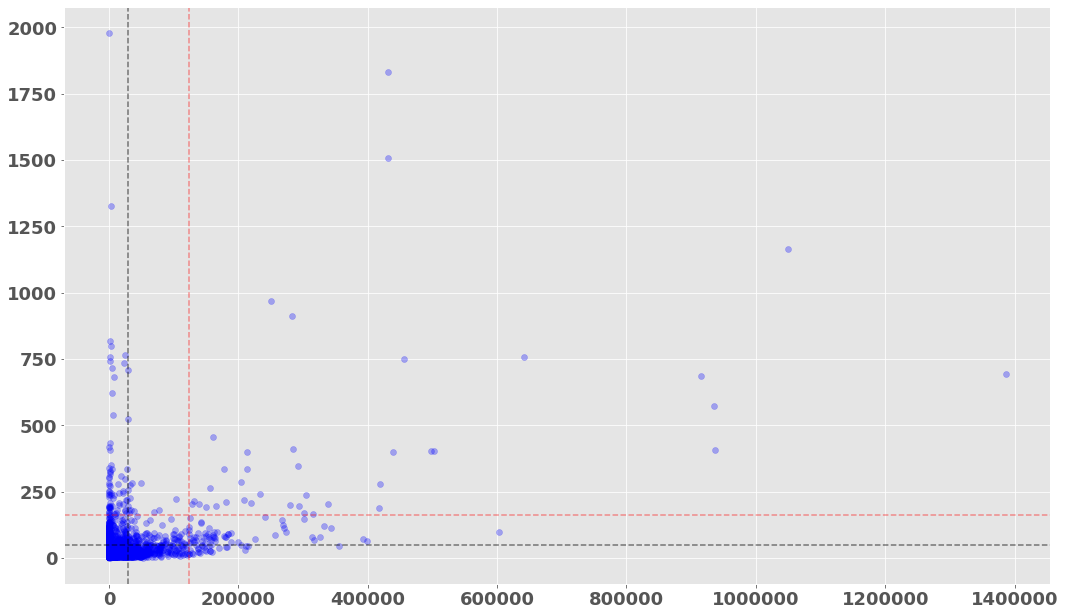

In [151]:
#International v case_rate
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
a1 = clean_df2
pop_mean = a1['Pop'].mean()
plt.scatter(a1['international'], a1['case_rate'] , color = 'blue', label="actual data", alpha=0.3) 
plt.axhline(y=a1['case_rate'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axvline(x=a1['international'].mean(), color='black', linestyle='--', alpha=0.5)
plt.axhline(y=a1['case_rate'].quantile(.95), color='r', linestyle='--', alpha=0.4)
plt.axvline(x=a1['international'].quantile(.95), color='r', linestyle='--', alpha=0.4)

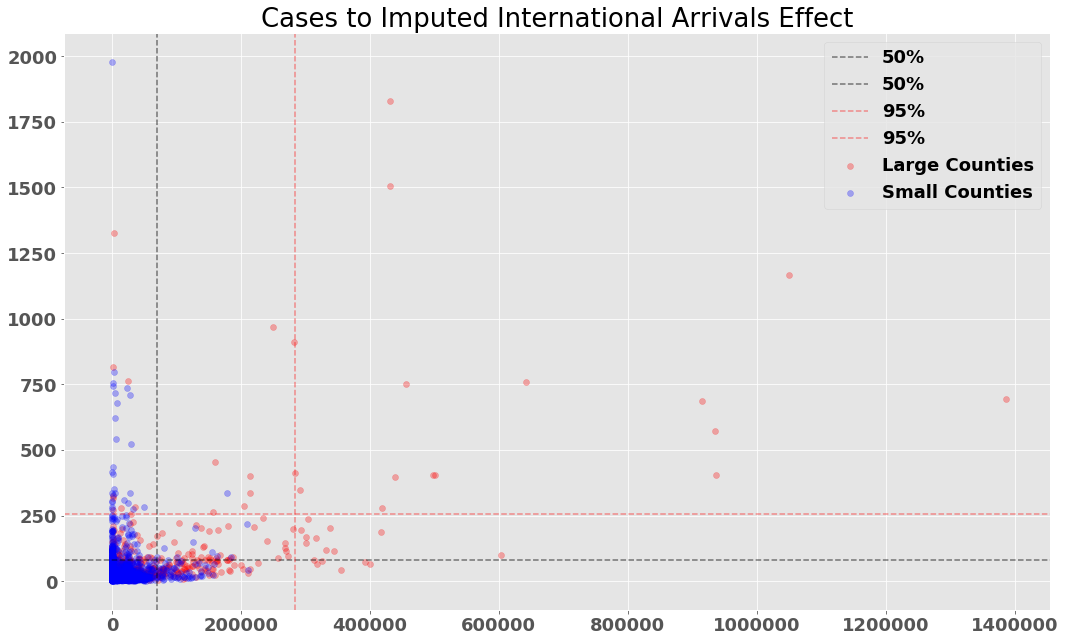

In [159]:
#International v case_rate
fig, ax = plt.subplots(figsize=(15,9))
fig.tight_layout()
pop_threshold = a1['Pop'].quantile(0.5)
a1 = clean_df2[clean_df['Pop']>pop_threshold]
a2 = clean_df2[clean_df['Pop']<pop_threshold]

plt.scatter(a1['international'], a1['case_rate'] , color = 'red', alpha=0.3, label='Large Counties') 
plt.scatter(a2['international'], a2['case_rate'] , color = 'blue', alpha=0.3, label='Small Counties') 
plt.axhline(y=a1['case_rate'].mean(), color='black', linestyle='--', alpha=0.5, label='50%')
plt.axvline(x=a1['international'].mean(), color='black', linestyle='--', alpha=0.5, label='50%')
plt.axhline(y=a1['case_rate'].quantile(.95), color='r', linestyle='--', alpha=0.4, label='95%')
plt.axvline(x=a1['international'].quantile(.95), color='r', linestyle='--', alpha=0.4, label='95%')
ax.set_title("Cases to Imputed International Arrivals Effect")
ax.legend()

In [157]:
#H0 = counties with over 10m in int'l arrivals w/i 100km have the same Coronavirus rate as those with less than 10m
threshold = 10
s1 = clean_df2[clean_df['international']>=threshold]
s1mu = s1['case_rate'].mean()
s1std = s1['case_rate'].std()
s1se = s1['case_rate'].std()/np.sqrt(len(s1))
s2 = clean_df2[clean_df['international']<threshold]
s2mu = s2['case_rate'].mean()
s2std = s2['case_rate'].std()
s2se = s2['case_rate'].std()/np.sqrt(len(s2))
print('Sample 1 mu: {}, std: {}, se: {}, count: {}'.format(s1mu, s1std, s1se, len(s1)))
print('Sample 2 mu: {}, std: {}, se: {}, count: {}'.format(s2mu, s2std, s2se, len(s2)))

Sample 1 mu: 81.06626927089364, std: 163.15001407396628, se: 6.459170911151048, count: 638
Sample 2 mu: 38.95184287497031, std: 75.16278190060368, se: 1.7845389766258386, count: 1774


In [154]:
#Must go non-parametric: U-test
results = stats.mannwhitneyu(s1['case_rate'], s2['case_rate'], alternative="greater")
print(results)

MannwhitneyuResult(statistic=742735.5, pvalue=4.952956567855996e-32)


In [147]:
s2['case_rate']

0         21.989701
1         20.848764
2         10.926175
3         30.547676
4         17.445309
5         27.487631
6          4.773953
7         32.048038
8        280.578694
9         23.086691
10        45.826364
11        43.293167
12        34.839159
13        64.599483
14        60.112209
15        16.016657
16        12.861027
17        15.119444
18        69.330098
19        13.239772
20        14.382281
21        24.873766
22         7.960041
23        15.974441
24        19.688084
25        25.219727
26         7.829014
27        40.218328
28         5.800128
29        22.079233
30        88.446656
31        31.725888
32        23.118715
33        23.634376
34        31.938678
35        66.518241
36        34.331228
37        17.258303
38        23.297126
39        84.137272
40        39.863738
41        53.102044
42        23.307850
43        42.113312
44        61.825272
45        61.736418
46        36.551672
47        35.836045
48        21.675048
49        30.955298
